<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/ex_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#9921005149 GURRAM VAMSI
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from datetime import datetime
liver_data = pd.read_csv('indian_liver_patient.csv')
display(liver_data.head(n=5))
liver_data.info()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease167
Percentage of patients likely to have liver disease71.35506003430532%


<Axes: xlabel='Dataset', ylabel='count'>

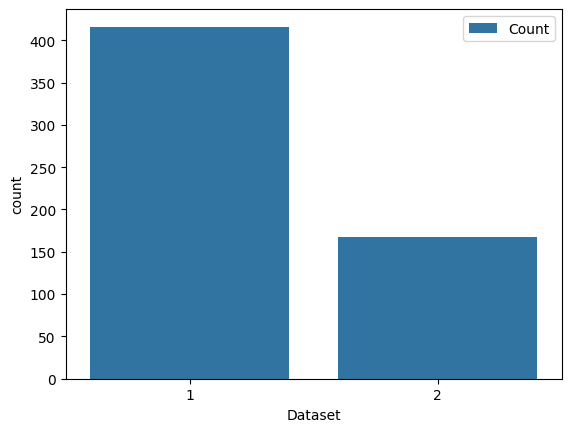

In [2]:
import seaborn as sns
n_records = len(liver_data.index)
n_records_liv_pos = len(liver_data[liver_data['Dataset'] == 1])
n_records_liv_neg = len(liver_data[liver_data['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100
print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease{}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease{}%".format(percent_liver_disease_pos))
sns.countplot(data=liver_data, x = 'Dataset', label='Count')
#9921005149

In [3]:
liver_data_labels = liver_data['Dataset']
# Drop label feature
liver_data_features = liver_data.drop(['Dataset'], axis=1)
display(liver_data_features[liver_data_features['Albumin_and_Globulin_Ratio'].isnull()])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN


In [4]:
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)
albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.93
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.93
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.93
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.93


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

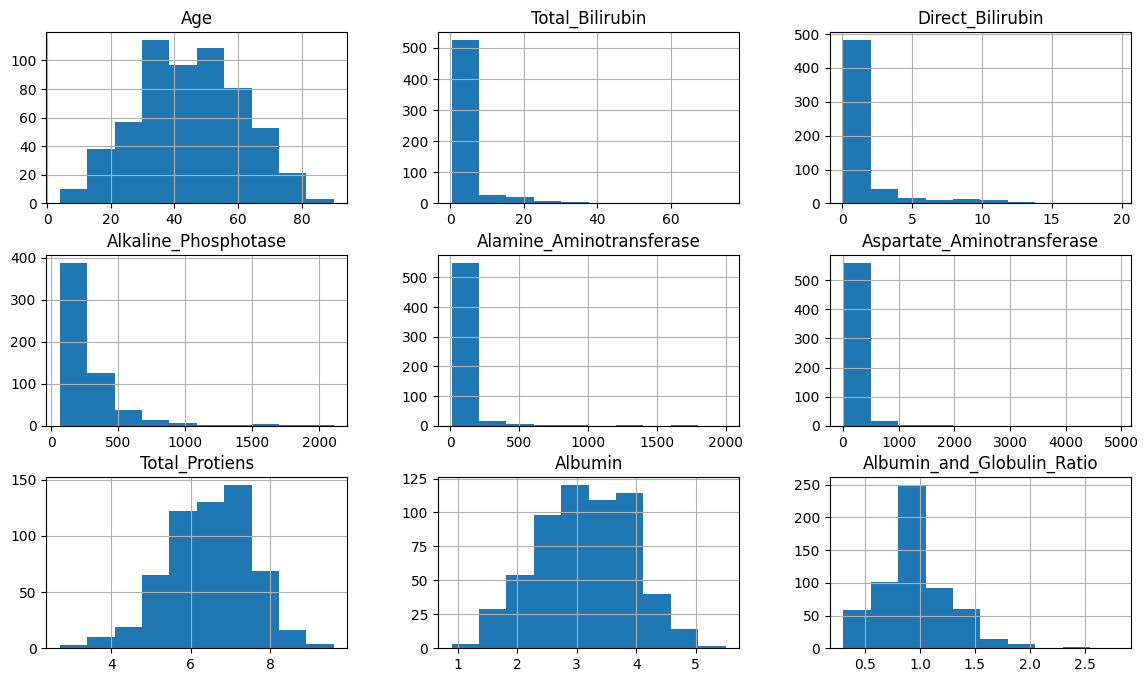

In [5]:
liver_data_features.hist(figsize=(14,8))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

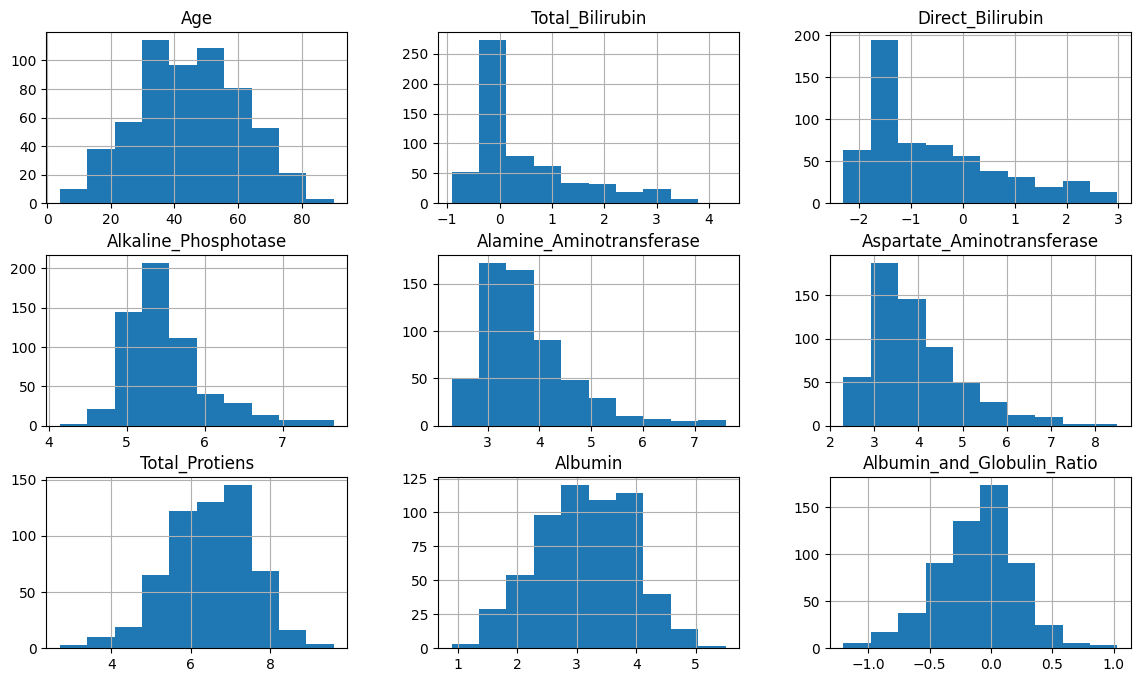

In [6]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
'Albumin_and_Globulin_Ratio']
liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] =liver_data_features[skewed].apply(lambda x: np.log(x))
liver_data_features_log_transformed.hist(figsize=(14,8))

In [7]:
liver_data_features_log_transformed.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.463421,-0.650373,5.493417,3.751829,3.956771,6.483190,3.141852,-0.111273
std,16.189833,1.018527,1.326394,0.528128,0.900236,0.997381,1.085451,0.795519,0.344530
min,4.000000,-0.916291,-2.302585,4.143135,2.302585,2.302585,2.700000,0.900000,-1.203973
25%,33.000000,-0.223144,-1.609438,5.167635,3.135494,3.218876,5.800000,2.600000,-0.356675
50%,45.000000,0.000000,-1.203973,5.337538,3.555348,3.737670,6.600000,3.100000,-0.072571
75%,58.000000,0.955511,0.262364,5.697093,4.102609,4.465908,7.200000,3.800000,0.095310
max,90.000000,4.317488,2.980619,7.654443,7.600902,8.502891,9.600000,5.500000,1.029619


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
'Alamine_Aminotransferase',
'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
'Albumin_and_Globulin_Ratio']
liver_data_features_log_minmax_transform = pd.DataFrame(data =liver_data_features_log_transformed)
liver_data_features_log_minmax_transform[numerical] =scaler.fit_transform(liver_data_features_log_transformed[numerical])
display(liver_data_features_log_minmax_transform.head(n = 5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,Female,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859
1,0.674419,Male,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222
2,0.674419,Male,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857
3,0.627907,Male,0.175072,0.262397,0.302130,0.063505,0.111792,0.594203,0.543478,0.539030
4,0.790698,Male,0.435110,0.567029,0.321779,0.187466,0.286268,0.666667,0.326087,0.128798


In [9]:
liver_data_features_final =pd.get_dummies(liver_data_features_log_minmax_transform,
columns=['Gender'])
liver_data_features_final.head(n=3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,0.709302,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859,1,0
1,0.674419,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222,0,1
2,0.674419,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857,0,1


In [10]:
true_pos = n_records_liv_pos
false_pos = liver_data_labels.count() - true_pos
true_neg = 0
false_neg = 0
print('true positives: {} | true negatives: {}'.format(true_pos,false_pos))

true positives: 416 | true negatives: 167


In [11]:
accuracy = true_pos/liver_data_labels.count()
recall = true_pos/(true_pos + false_neg)
precision = true_pos/(true_pos + false_pos)
print('accuracy: {} | precision: {} | recall: {}'.format(accuracy, precision, recall))

accuracy: 0.7135506003430532 | precision: 0.7135506003430532 | recall: 1.0


In [12]:
beta = 2
fscore = (1 + beta * beta) * (precision * recall) / (beta * beta * precision + recall)

In [13]:
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy,
fscore))

Naive Predictor: [Accuracy score: 0.7136, F-score: 0.9257]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_final,
                             liver_data_labels,
                             test_size = 0.2,
                             random_state = 24,
                             shuffle = True)

In [15]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 466 samples.
Testing set has 117 samples.


In [16]:
from sklearn.metrics import fbeta_score,accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
  '''
  inputs:
  - learner: the learning algorithm to be trained and predicted on
  - sample_size: the size of samples (number) to be drawn from training set
  - X_train: features training set
  - y_train: income training set
  - X_test: features testing set
  - y_test: income testing set
  '''
  results = {}
  start = time() # Get start time
  learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
  end = time()
  results['train_time'] = end-start
  start = time() # Get start time
  predictions_test = learner.predict(X_test)
  predictions_train = learner.predict(X_train[:150])
  end = time()
  results['pred_time'] = end-start
  results['acc_train'] = accuracy_score(y_train[:150], predictions_train)
  results['acc_test'] = accuracy_score(y_test, predictions_test)
  results['f_train'] = fbeta_score(y_train[:150], predictions_train, beta=2)
  results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
  print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
  print(results)
  return results

In [17]:
from sklearn.linear_model import LogisticRegression
clf_bench = LogisticRegression(random_state=24)
sample_size = X_train.shape[0]
results_bench = {}
results_bench = train_predict(clf_bench, sample_size, X_train, y_train, X_test, y_test)
print('Accuracy score on training set: {} | Accuracy score on testing set: {} | F-scoreon training set: {} | F-score on test set: {}'.format(results_bench['acc_train'],results_bench['acc_test'], results_bench['f_train'], results_bench['f_test']))

LogisticRegression trained on 466 samples.
{'train_time': 0.03460526466369629, 'pred_time': 0.005197286605834961, 'acc_train': 0.7066666666666667, 'acc_test': 0.6837606837606838, 'f_train': 0.9001782531194296, 'f_test': 0.8720930232558138}
Accuracy score on training set: 0.7066666666666667 | Accuracy score on testing set: 0.6837606837606838 | F-scoreon training set: 0.9001782531194296 | F-score on test set: 0.8720930232558138


In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
clf_A = SVC(random_state=24)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=24)
clf_all = [clf_A, clf_B, clf_C]
clf_all = [clf_A, clf_B, clf_C]
#Calculate the number of samples for 20%, 50%, and 100% of the training data
samples_100 = len(y_train)
samples_50 = int(samples_100 * .5)
samples_20 = int(samples_100 * .2)
# # Collect results on the learners
results = {}
for clf in clf_all:
 clf_name = clf.__class__.__name__
 results[clf_name] = {}
 for i, samples in enumerate([samples_20, samples_50, samples_100]):
   results[clf_name][i] = \
   train_predict(clf, samples, X_train, y_train, X_test, y_test)

SVC trained on 93 samples.
{'train_time': 0.006616830825805664, 'pred_time': 0.0069751739501953125, 'acc_train': 0.72, 'acc_test': 0.6837606837606838, 'f_train': 0.9147424511545293, 'f_test': 0.8944954128440367}
SVC trained on 233 samples.
{'train_time': 0.008847951889038086, 'pred_time': 0.009588956832885742, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
SVC trained on 466 samples.
{'train_time': 0.016521453857421875, 'pred_time': 0.014313459396362305, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
KNeighborsClassifier trained on 93 samples.
{'train_time': 0.01047205924987793, 'pred_time': 0.08691239356994629, 'acc_train': 0.7666666666666667, 'acc_test': 0.6666666666666666, 'f_train': 0.8796296296296297, 'f_test': 0.8214285714285714}
KNeighborsClassifier trained on 233 samples.
{'train_time': 0.010920047760009766, 'pred_time': 0.05264878273010254, 'acc_train

In [19]:
{'train_time': 0.0, 'pred_time': 0.015625476837158203, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
{'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
{'train_time': 0.0, 'pred_time': 0.01562190055847168, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
{'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.7666666666666667, 'acc_test': 0.6666666666666666, 'f_train': 0.8796296296296297, 'f_test': 0.8214285714285714}
{'train_time': 0.015624046325683594, 'pred_time': 0.0, 'acc_train': 0.7533333333333333, 'acc_test': 0.6068376068376068, 'f_train': 0.8582089552238805, 'f_test': 0.7756563245823389}
{'train_time': 0.0, 'pred_time': 0.015626907348632812, 'acc_train': 0.78, 'acc_test': 0.6153846153846154, 'f_train': 0.900735294117647, 'f_test': 0.7352941176470588}
{'train_time': 0.015622138977050781, 'pred_time': 0.0, 'acc_train': 0.866666666666667, 'acc_test': 0.6068376068376068, 'f_train': 0.9227871939736347, 'f_test': 0.7420924574209246}
{'train_time': 0.01562666893005371, 'pred_time': 0.015624523162841797, 'acc_train': 0.98, 'acc_test': 0.6495726495726496, 'f_train': 0.9943181818181817, 'f_test': 0.8254716981132075}
{'train_time': 0.015624523162841797, 'pred_time': 0.0, 'acc_train': 0.9733333333333334, 'acc_test': 0.6923076923076923, 'f_train': 0.9924385633270322, 'f_test': 0.811138014527845}

{'train_time': 0.015624523162841797,
 'pred_time': 0.0,
 'acc_train': 0.9733333333333334,
 'acc_test': 0.6923076923076923,
 'f_train': 0.9924385633270322,
 'f_test': 0.811138014527845}

In [20]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf_D = LinearSVC(random_state=24)
clf_E = DecisionTreeClassifier(random_state=24)
clf_F = AdaBoostClassifier(random_state=24)
clf_more = [clf_D, clf_E, clf_F]
more_results = {}
for clf in clf_more:
  clf_name = clf.__class__.__name__
  more_results[clf_name] = {}
  for i, samples in enumerate([samples_20, samples_50, samples_100]):
    more_results[clf_name][i] = \
    train_predict(clf, samples, X_train, y_train, X_test, y_test)

LinearSVC trained on 93 samples.
{'train_time': 0.006670475006103516, 'pred_time': 0.005403280258178711, 'acc_train': 0.74, 'acc_test': 0.6752136752136753, 'f_train': 0.9025270758122744, 'f_test': 0.8153477218225419}
LinearSVC trained on 233 samples.
{'train_time': 0.007715463638305664, 'pred_time': 0.005059242248535156, 'acc_train': 0.7266666666666667, 'acc_test': 0.7008547008547008, 'f_train': 0.9163701067615658, 'f_test': 0.9059633027522935}
LinearSVC trained on 466 samples.
{'train_time': 0.008505582809448242, 'pred_time': 0.004996776580810547, 'acc_train': 0.7266666666666667, 'acc_test': 0.6752136752136753, 'f_train': 0.9107142857142857, 'f_test': 0.8548009367681499}
DecisionTreeClassifier trained on 93 samples.
{'train_time': 0.005908012390136719, 'pred_time': 0.004593372344970703, 'acc_train': 0.8333333333333334, 'acc_test': 0.5897435897435898, 'f_train': 0.9022556390977444, 'f_test': 0.7299270072992701}
DecisionTreeClassifier trained on 233 samples.
{'train_time': 0.00556206703

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from datetime import datetime
clf = SVC(random_state=24)
kernel_options = ['linear', 'poly', 'rbf']
c_param_options = [0.01, 0.1, 1, 10]
gamma_param_options = [0.001, 0.01, 0.1, 1]
parameters = {'C': c_param_options, 'kernel': kernel_options, 'gamma':
gamma_param_options}
scorer = make_scorer(fbeta_score, beta=2)
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters,
scoring=scorer, n_jobs=-1, verbose=1, cv=5)
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator
best_clf = grid_fit.best_estimator_
# print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
# # Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta =2)))
print("\nOptimized Model\n------")
print("Vmsi 9921005149")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test,best_predictions, beta = 2)))
best_params = grid_fit.best_params_
best_score = grid_fit.best_score_
cv_results = grid_fit.cv_results_
print("Best parameters: {}".format(best_params))
print("Best score: {}".format(best_score))
print("CV results: {}".format(cv_results))
print(datetime.now())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Unoptimized model
------
Accuracy score on testing data: 0.6923
F-score on testing data: 0.9184

Optimized Model
------
Vmsi 9921005149
Final accuracy score on the testing data: 0.6923
Final F-score on the testing data: 0.9184
Best parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 0.927465144396321
CV results: {'mean_fit_time': array([0.0284112 , 0.02512751, 0.01963758, 0.02070231, 0.01759763,
       0.02084198, 0.01197147, 0.02599125, 0.01782084, 0.02315869,
       0.03115263, 0.02654839, 0.0290977 , 0.0264431 , 0.025739  ,
       0.02648888, 0.02066927, 0.01988573, 0.02655807, 0.01369905,
       0.02009578, 0.01276903, 0.02608528, 0.017907  , 0.04975777,
       0.03680196, 0.04753208, 0.02260919, 0.01555877, 0.01556273,
       0.02377119, 0.02400823, 0.0208425 , 0.02946744, 0.03889565,
       0.02183924, 0.01875939, 0.02143755, 0.02663631, 0.02525206,
       0.01401424, 0.03126936, 0.02603951, 0.01791

<ipython-input-22-c1301ffa6069>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = liver_data_features.corr()


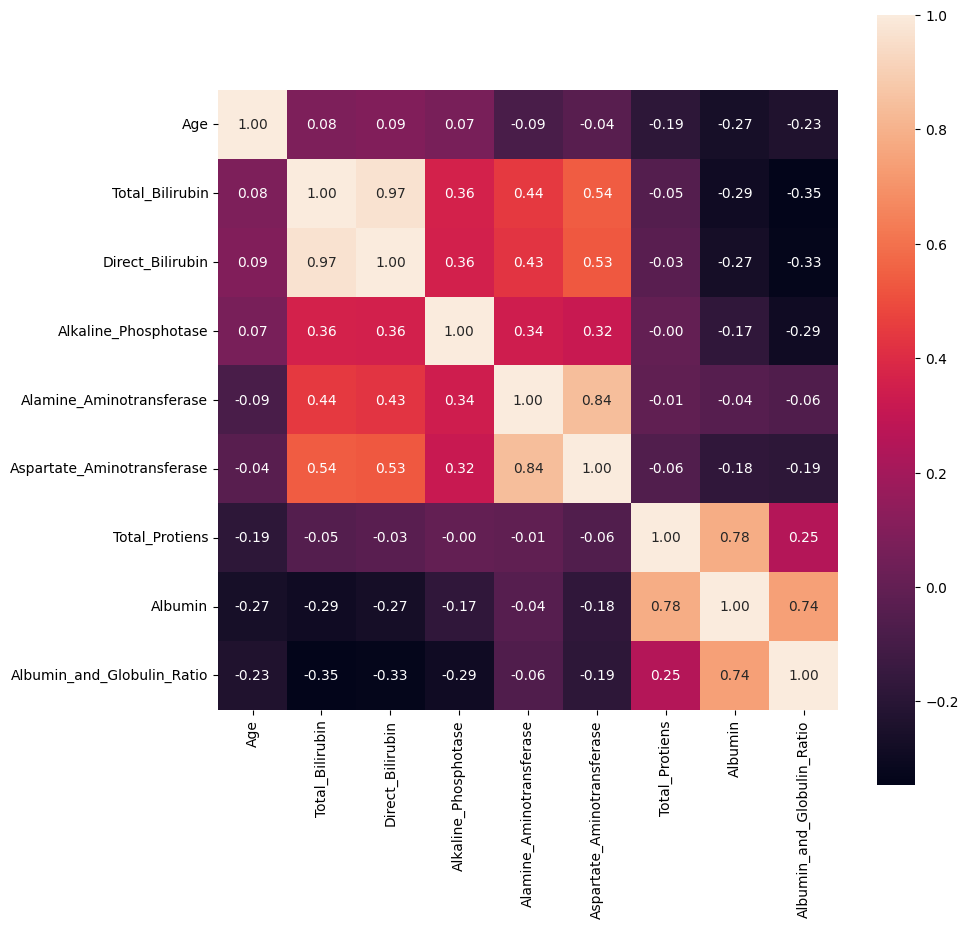

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
correlations = liver_data_features.corr()
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 10})

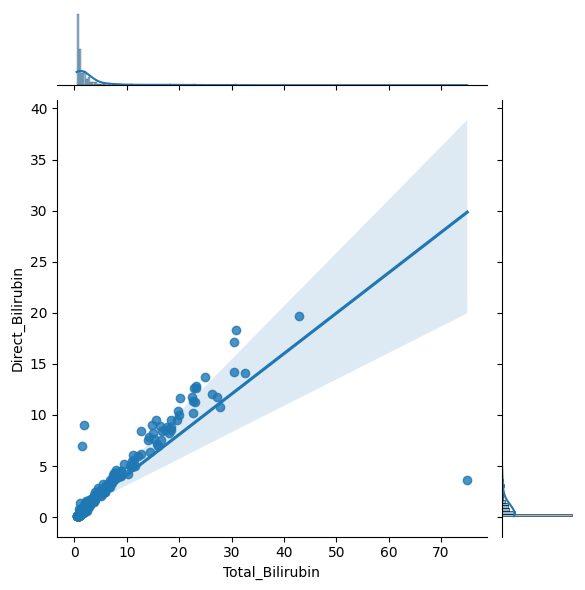

In [23]:
sns.jointplot(x="Total_Bilirubin",y= "Direct_Bilirubin", data=liver_data,kind="reg")
#9921005149

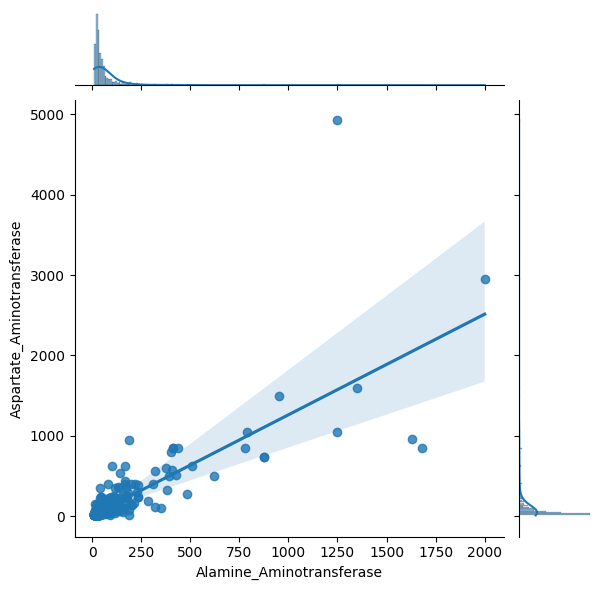

In [24]:
sns.jointplot(x="Alamine_Aminotransferase", y="Aspartate_Aminotransferase", data=liver_data, kind="reg")
#9921005149

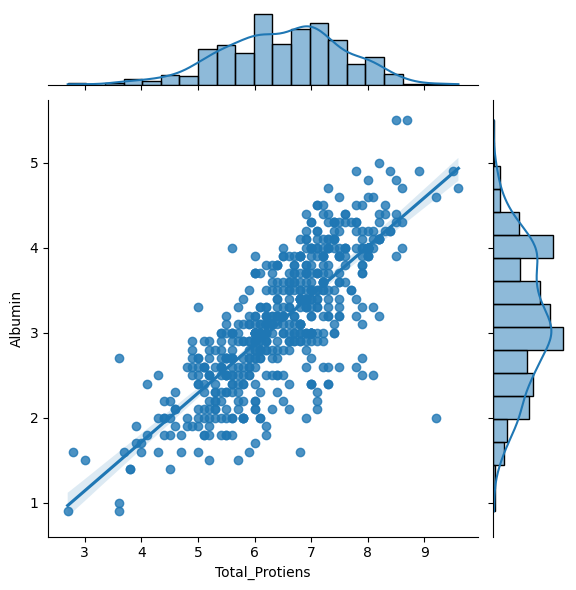

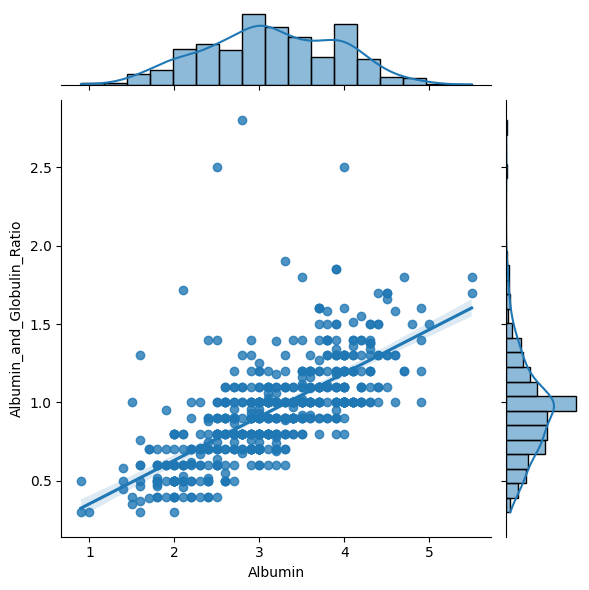

In [25]:
sns.jointplot(x="Total_Protiens",y= "Albumin", data=liver_data, kind="reg")
sns.jointplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=liver_data, kind="reg")
